# FUV
> Some specific FUV stuff

In [ ]:
from pathlib import Path
from pyuvis.io import FUV, HSP, UVIS_NetCDF

In [ ]:
folder = %path /Users/klay6683/Dropbox/SternchenAndMe/Enceladus_stuff/UVIS/UVIS_Enc_Occ_2005_07_14/
folder

PosixPath('/Users/klay6683/Dropbox/SternchenAndMe/Enceladus_stuff/UVIS/UVIS_Enc_Occ_2005_07_14')

In [ ]:
fuvfiles = list(folder.glob('*FUV*'))

In [ ]:
fuvfiles

[PosixPath('/Users/klay6683/Dropbox/SternchenAndMe/Enceladus_stuff/UVIS/UVIS_Enc_Occ_2005_07_14/FUV2005_195_19_52_08_UVIS_011EN_ICYEXO001_PRIME')]

In [ ]:
fuv = FUV(fuvfiles[0])

In [ ]:
fuv.data

<xarray.DataArray 'counts' (times: 71, pixels: 25, wavelengths: 512)>
[908800 values with dtype=int16]
Coordinates:
  * times        (times) datetime64[ns] 2005-07-14T19:52:08 ...
  * wavelengths  (wavelengths) float64 111.5 111.7 111.8 112.0 112.1 112.3 ...
Dimensions without coordinates: pixels
Attributes:
    spaul:    19.0
    specul:   0.0
    spalr:    43.0
    speclr:   1023.0
    spabin:   1.0
    specbin:  2.0

In [ ]:
df = pd.DataFrame(np.random.randn(6,3))
df

,0,1,2
0,0.080827,-0.324635,-1.858321
1,-0.339517,0.358427,-0.459295
2,0.445277,0.215648,-1.192955
3,-0.286175,-0.089780,0.186284
4,0.060676,-0.207843,0.046175
5,0.533620,-0.678106,-0.352628


In [ ]:
df.index = pd.date_range('now', frequency='1d', periods=6)

In [ ]:
df

,0,1,2
2018-03-16 17:47:54.649690,0.080827,-0.324635,-1.858321
2018-03-17 17:47:54.649690,-0.339517,0.358427,-0.459295
2018-03-18 17:47:54.649690,0.445277,0.215648,-1.192955
2018-03-19 17:47:54.649690,-0.286175,-0.089780,0.186284
2018-03-20 17:47:54.649690,0.060676,-0.207843,0.046175
2018-03-21 17:47:54.649690,0.533620,-0.678106,-0.352628


In [ ]:
df.index[0]

Timestamp('2018-03-16 17:47:54.649690', freq='D')

In [ ]:
import spiceypy as spice

In [ ]:
spice.furnsh("/Users/klay6683/Dropbox/SternchenAndMe/SPICE_kernels/lsk/naif0011.tls")

In [ ]:
[spice.utc2et(str(i)) for i in df.index]

[574494542.8352653,
 574580942.835274,
 574667342.8352821,
 574753742.8352898,
 574840142.835297,
 574926542.8353038]

In [ ]:
fuv.

KeyError: 'integrations'

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns
sns.set_context('notebook')

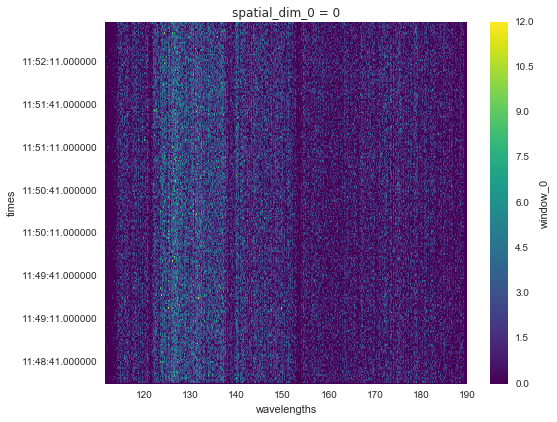

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fuv.data[:,0].plot(ax=ax)
fig.tight_layout()

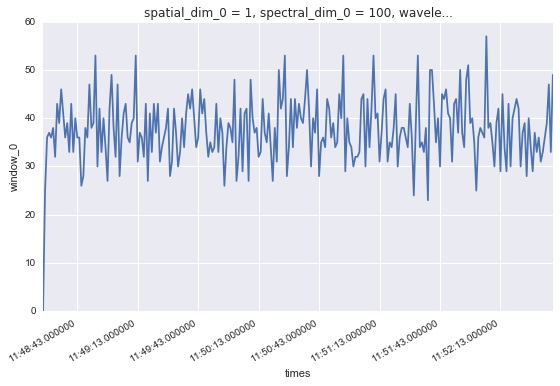

In [ ]:
fuv.data[:, 1, 100].plot()
plt.tight_layout()

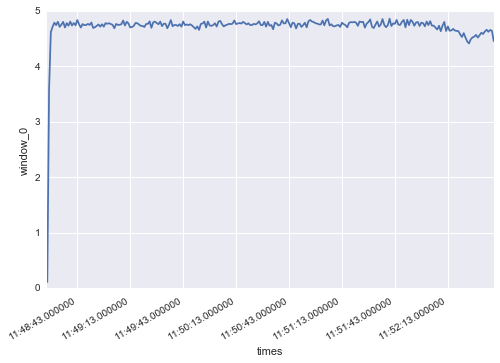

In [ ]:
plt.figure()
fuv.data.mean(['spatial_dim_0', 'wavelengths']).plot()

In [ ]:
spec = fuv.data[100]

In [ ]:
spec

<xarray.DataArray 'window_0' (spatial_dim_0: 5, wavelengths: 512)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)
Coordinates:
    integrations    int64 100
  * spatial_dim_0   (spatial_dim_0) int64 0 1 2 3 4
    spectral_dim_0  (wavelengths) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
    times           datetime64[ns] 2016-03-11T11:50:06
  * wavelengths     (wavelengths) float64 111.5 111.7 111.8 112.0 112.1 ...
Attributes:
    spaul: 30.0
    speclr: 1023.0
    spalr: 34.0
    specbin: 2.0
    spabin: 1.0
    specul: 0.0

In [ ]:
p = Path('./plots')

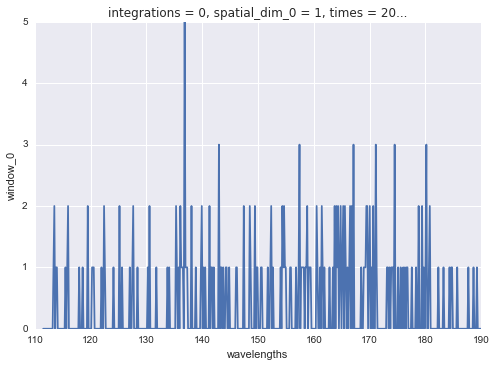

In [ ]:
plt.figure()
fuv.data[0][1].plot()

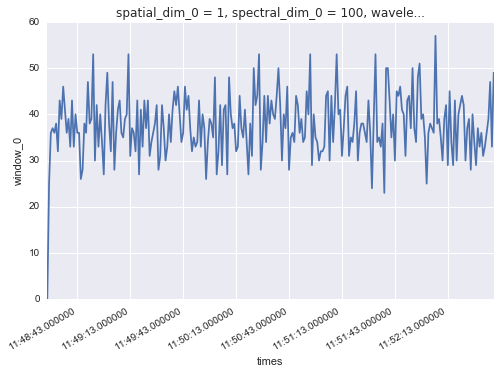

In [ ]:
plt.figure()
fuv.data[:,1,100].plot()

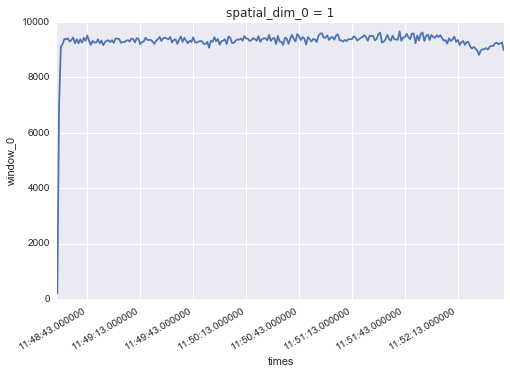

In [ ]:
plt.figure()
fuv.data.sum(['wavelengths'])[:, 1].plot()